# Maching Learning - Logistic Regression

CS440/640


<br>      This code is about how to implement Logistic Regression                                                                      



In [1]:
# Import Python libraries
import numpy as np    # numpy is the fundamental package for scientific computing with Python, such linear algebra, array...
import copy           #use copy package for deepcopy of initial weights
import matplotlib.pyplot as plt      # matplotlib is a Python 2D plotting library which produces publication quality figures.

## Logistic Regression Model 


In [2]:
class Neural_Network:
    
    

    """
    This lab implements a Neural Network Classifier.
    """

    def __init__(self, input_dim, hidden_dim, output_dim):
        """
        Initializes the parameters of the Neural classifer to 
        random values.

        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
        """
        #initializing weights
        self.theta1 = np.random.randn(input_dim, hidden_dim)/np.sqrt(input_dim)      
        self.bias1 = np.zeros((1, hidden_dim))
        self.theta2 = np.random.randn(hidden_dim, output_dim)/np.sqrt(hidden_dim)    
        self.bias2 = np.zeros((1, output_dim))
        
        #making a copy of initialized weigths to run the regularization fit on the same model
        self.temptheta1 = copy.deepcopy(self.theta1) 
        self.tempbias1 = copy.deepcopy(self.bias1)
        self.temptheta2 = copy.deepcopy(self.theta2)
        self.tempbias2 = copy.deepcopy(self.bias2)

    #--------------------------------------------------------------------------
  

    def compute_cost_with_regularization(self, X,a3, y, lambd=0.7):
        """
        Computes the cross-entropy cost 

        Arguments:
        a3 -- The sigmoid output of the activation, of shape (1, number of examples)
        Y -- "true" labels vector of shape (1, number of examples)
        X -- dataset X
        lambd -- regularization hyperparameter, scalar

        Returns:
        cost - value of the regularized loss function (formula (2))
        """

        m = X.shape[0] # number of example
       

        # Compute the cross-entropy cost
        logprobs = np.multiply(y, np.log(a3)) + np.multiply((1 - y), np.log(1 - a3))
        cross_entropy_cost = (-1.0/m) * np.sum(logprobs)

        # Compute L2 regularization cost
        L2_regularization_cost = (np.sum(np.square(self.theta1)) + np.sum(np.square(self.theta2)))*(lambd/(2*m))

        # add cross_entropy_cost and L2_regularization_cost
        cost = cross_entropy_cost + L2_regularization_cost

        # makes sure cost is the dimension we expect. 
        cost = np.squeeze(cost)

        return cost
    
    def compute_cost(self, X, a3, one_hot_y):
        """
        Computes the cross-entropy cost 

        Arguments:
        a3 -- The sigmoid output of the activation, of shape (1, number of examples)
        one_hot_Y -- "true" labels vector of shape (1, number of examples)
        X -- dataset X

        Returns:
        cost - value of the regularized loss function (formula (2))
        """
        
        m = X.shape[0]
        
        
        # Compute the cross-entropy cost

        logprobs = np.multiply(one_hot_y, np.log(a3)) + np.multiply((1-one_hot_y), np.log(1-a3))
        cross_entropy_cost = (-1.0/m) * np.sum(logprobs)
        
        return cross_entropy_cost

    #--------------------------------------------------------------------------
 
    def predict_regularization(self,X):
        """
        Makes a prediction based on current model parameters with L2 regularization.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z2 = np.dot(X,self.theta1) + self.bias1
        a2 = np.tanh(z2)
        z3 = np.dot(a2, self.theta2) + self.bias2
        a3 = np.exp(z3) / np.sum(np.exp(z3), axis=1, keepdims=True)
        predictions = np.argmax(a3, axis = 1)
        
        return predictions
    
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z2 = np.dot(X,self.temptheta1) + self.tempbias1
        a2 = np.tanh(z2)
        z3 = np.dot(a2, self.temptheta2) + self.tempbias2
        a3 = np.exp(z3) / np.sum(np.exp(z3), axis=1, keepdims=True)
        predictions = np.argmax(a3, axis = 1)
        
        return predictions
        
    #--------------------------------------------------------------------------
    # implement logistic regression using gradient descent 
    #--------------------------------------------------------------------------
    def fit_regularization(self,X,y,num_epochs,alpha=0.01,lambd=0.7, flag = 1):
    
        #Learns model parameters to fit the data.
  
        costs=list()
        for epoch in range(0, num_epochs):

            # Forward propagation
            z2 = np.dot(X,self.theta1) + self.bias1
            a2 = np.tanh(z2) # use tanh function
            z3 = np.dot(a2, self.theta2) + self.bias2
            a3 = np.exp(z3) / np.sum(np.exp(z3), axis=1, keepdims=True)
            
            

        
            # Backpropagation
            beta3 = np.zeros_like(a3)
            beta2 = np.zeros_like(a2)
            one_hot_y = np.zeros_like(a3)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
           
            beta3 = a3 - one_hot_y
            beta2 = np.multiply(beta3.dot(self.theta2.T),(1-np.power(a2,2)))

         
    
            # number of samples
            
            m = X.shape[0]
            
            # Compute gradients of model parameters
            dtheta2 = 1/m*np.dot(a2.T,beta3) + (lambd/m)*self.theta2
            dbias2 = 1/m*np.sum(beta3, axis=0)
            
            
            dtheta1 = 1/m*np.dot(X.T,beta2) + (lambd/m)*self.theta1
            dbias1 = 1/m*np.sum(beta2, axis=0)
            costs.append(self.compute_cost_with_regularization(X,a3,one_hot_y)) #calculating cost
            if flag == 1:
                if epoch%100 == 0:
                    print("Cost for epoch", epoch, "is", costs[epoch]) #printing cost of every 10th epoch

            # Gradient descent parameter update
            self.theta1 -= alpha * dtheta1
            self.bias1 -= alpha * dbias1
            
            self.theta2 -= alpha * dtheta2
            self.bias2 -= alpha * dbias2
            
            

        return 0

    def fit(self,X,y,num_epochs,alpha=0.01, flag=1):
    
        #Learns model parameters to fit the data.
        costs1 = list()
        for epoch in range(0, num_epochs):

            # Forward propagation
            z2 = np.dot(X,self.temptheta1) + self.tempbias1
            a2 = np.tanh(z2)
            z3 = np.dot(a2, self.temptheta2) + self.tempbias2
            a3 = np.exp(z3) / np.sum(np.exp(z3), axis=1, keepdims=True)

            # Backpropagation
            beta3 = np.zeros_like(a3)
            beta2 = np.zeros_like(a2)
            one_hot_y = np.zeros_like(a3)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1

            beta3 = a3 - one_hot_y

            # Get number of samples
            m = X.shape[0]

            # Compute gradients of model parameters
            dtheta2 = 1/m*(a2.T).dot(beta3)
            dbias2 = 1/m*np.sum(beta3, axis=0)

            beta2 = np.multiply(beta3.dot(self.temptheta2.T),(1-np.power(a2,2)))

            dtheta1 = 1/m*np.dot(X.T,beta2)
            dbias1 = 1/m*np.sum(beta2, axis=0)
            costs1.append(self.compute_cost(X,a3,one_hot_y)) #calculating cost
            if flag == 1:                    
                if epoch%100 == 0:
                    print("Cost for epoch", epoch, "is", costs1[epoch]) #printing cost of every 10th epoch


            # Gradient descent parameter update
            self.temptheta1 -= alpha * dtheta1
            self.tempbias1 -= alpha * dbias1

            self.temptheta2 -= alpha * dtheta2
            self.tempbias2 -= alpha * dbias2
#             
        return 0

In [7]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()
    
def plot_decision_boundary_regularization(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict_regularization(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

## Data Analysis Basics

In [8]:
#1. Load data 
#nonlinear data
X = np.genfromtxt('DATA/data_nonLinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('DATA/data_nonLinearY.csv', delimiter=',').astype(np.int64)
#linear data
X1 = np.genfromtxt('DATA/data_LinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y1 = np.genfromtxt('DATA/data_LinearY.csv', delimiter=',').astype(np.int64)

## Nonlinear data 

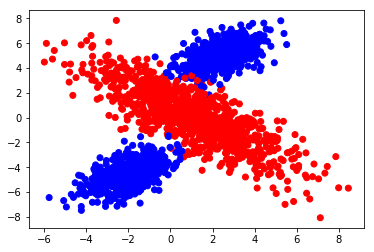

In [9]:
#2. plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

## 5-fold cross validation

In [10]:
#spliting dataset X
xtrain=[]
xtest = np.split(X,5)
for i in range(0,5):
    xtrain.append(np.asarray([x for x in X if x not in xtest[i]]))
xtrain = np.asarray(xtrain)

#spliting dataset y
ytest = np.split(y,5)
ytrain = []
ytrain.append(y[400:2000])
ytrain.append(np.concatenate((y[:400],y[800:2000])))
ytrain.append(np.concatenate((y[:800],y[1200:2000])))
ytrain.append(np.concatenate((y[:1200],y[1600:2000])))
ytrain.append(y[:1600])
ytrain = np.asarray(ytrain)

In [5]:
#3. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
nnmodel = Neural_Network(input_dim,10,output_dim)

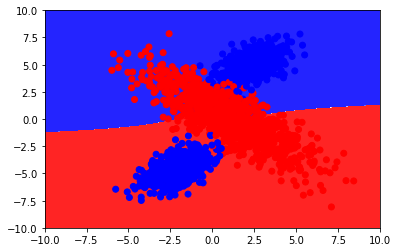

In [11]:
#4. Plot decision boundary
plot_decision_boundary(nnmodel, X, y)

## Train Classification Model
**Classification** tries to predict, which of a small set of classes, a sample in a population belongs to. Mathematically, the aim is to find $y$, a **label** based on knowing a feature vector $X$.

## Model: nonlinear data with regularization

Cost for epoch 0 is 1.6014177514266064
Cost for epoch 100 is 1.259856471262809
Cost for epoch 200 is 1.200812052203711
Cost for epoch 300 is 1.146499265867472
Cost for epoch 400 is 1.0931346368479633
Cost for epoch 500 is 1.0384857163644359
Cost for epoch 600 is 0.9812828930062875
Cost for epoch 700 is 0.9208873338065564
Cost for epoch 800 is 0.8568460388331406
Cost for epoch 900 is 0.7889536818811841


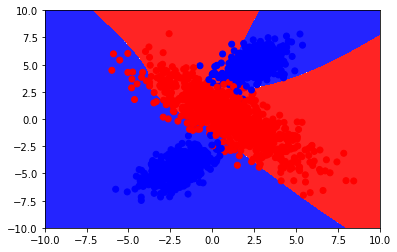

ACCURACY:  0.91
CONFUSION MATRIX: 
 [[180.  17.]
 [ 19. 184.]]
Cost for epoch 0 is 0.7274296342991413
Cost for epoch 100 is 0.6596283422897666
Cost for epoch 200 is 0.5990516110886548
Cost for epoch 300 is 0.5452394197820326
Cost for epoch 400 is 0.4977197505920855
Cost for epoch 500 is 0.45603469201876784
Cost for epoch 600 is 0.4196220137333244
Cost for epoch 700 is 0.38785681344685397
Cost for epoch 800 is 0.36011844505873936
Cost for epoch 900 is 0.33583391829061715


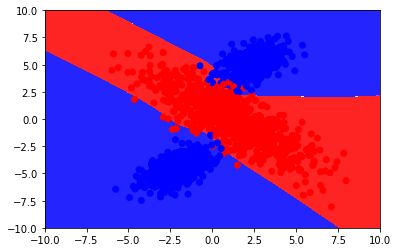

ACCURACY:  0.98
CONFUSION MATRIX: 
 [[185.   4.]
 [  4. 207.]]
Cost for epoch 0 is 0.30839806192648195
Cost for epoch 100 is 0.2896030328938063
Cost for epoch 200 is 0.27297983342651183
Cost for epoch 300 is 0.2582000988898919
Cost for epoch 400 is 0.24499930254440797
Cost for epoch 500 is 0.2331577755076134
Cost for epoch 600 is 0.22249188373987938
Cost for epoch 700 is 0.2128474393148809
Cost for epoch 800 is 0.20409445831210352
Cost for epoch 900 is 0.1961229161135773


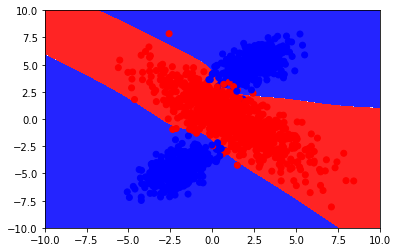

ACCURACY:  0.98
CONFUSION MATRIX: 
 [[194.   3.]
 [  5. 198.]]
Cost for epoch 0 is 0.19120478634718047
Cost for epoch 100 is 0.18449494127420107
Cost for epoch 200 is 0.17846386540816722
Cost for epoch 300 is 0.17292629064683274
Cost for epoch 400 is 0.167816764974904
Cost for epoch 500 is 0.16308805456094544
Cost for epoch 600 is 0.1587011882666714
Cost for epoch 700 is 0.1546226933310977
Cost for epoch 800 is 0.15082336556953468
Cost for epoch 900 is 0.14727752313755568


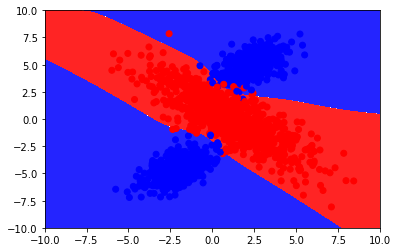

ACCURACY:  0.985
CONFUSION MATRIX: 
 [[215.   4.]
 [  2. 179.]]
Cost for epoch 0 is 0.1501576818396775
Cost for epoch 100 is 0.1466202706262112
Cost for epoch 200 is 0.14349700129829435
Cost for epoch 300 is 0.14061224035263342
Cost for epoch 400 is 0.13791540439068103
Cost for epoch 500 is 0.13538208151847522
Cost for epoch 600 is 0.13299644159584847
Cost for epoch 700 is 0.1307461273363582
Cost for epoch 800 is 0.12862059628880781
Cost for epoch 900 is 0.12661051084525277


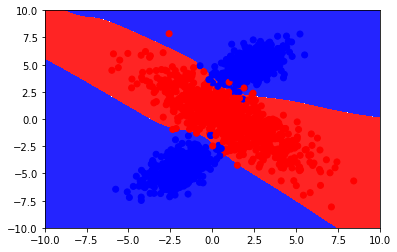

ACCURACY:  0.9925
CONFUSION MATRIX: 
 [[195.   2.]
 [  1. 202.]]
Average ACCURACY of 5 folds:  0.9695


In [13]:
avg_fold=0
for i in range(5):
    #5. Train the model
    nnmodel.fit_regularization(xtrain[i],ytrain[i],1000,alpha=0.01)
    #6. Plot decision boundary after trainning
    plot_decision_boundary_regularization(nnmodel, xtrain[i], ytrain[i])
    #7. compute accuracy and confusion matrix
    acc = 0
    y_pred = nnmodel.predict_regularization(xtest[i])
    con_mat = np.zeros((output_dim, output_dim))
    for j in range(len(y_pred)):
        con_mat[y_pred[j], ytest[i][j]] += 1
        if ytest[i][j] == y_pred[j]:
            acc += 1
    acc = acc/len(y_pred)
    avg_fold += acc
    print ('ACCURACY: ', acc)
    print ('CONFUSION MATRIX: \n', con_mat)
    
print ('Average ACCURACY of 5 folds: ', avg_fold / 5)



## Model: nonlinear data with out regularization

Cost for epoch 0 is 1.5990939157716324
Cost for epoch 100 is 1.2574949716341848
Cost for epoch 200 is 1.198348816019844
Cost for epoch 300 is 1.1439113609035783
Cost for epoch 400 is 1.0904155931878508
Cost for epoch 500 is 1.0356379605902077
Cost for epoch 600 is 0.9783118792617072
Cost for epoch 700 is 0.9177983979802542
Cost for epoch 800 is 0.8536410222063561
Cost for epoch 900 is 0.7856216266550828


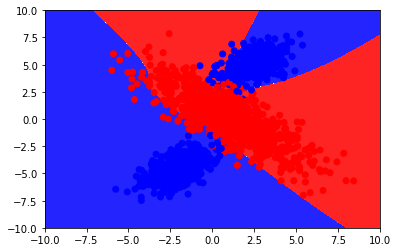

ACCURACY:  0.91
CONFUSION MATRIX: 
 [[180.  17.]
 [ 19. 184.]]
Cost for epoch 0 is 0.7239521800149115
Cost for epoch 100 is 0.6559678421735842
Cost for epoch 200 is 0.5952315964405662
Cost for epoch 300 is 0.5412852048341018
Cost for epoch 400 is 0.4936531749693647
Cost for epoch 500 is 0.4518745133550564
Cost for epoch 600 is 0.4153827975162034
Cost for epoch 700 is 0.38354908065579474
Cost for epoch 800 is 0.3557494778578782
Cost for epoch 900 is 0.33140863504361423


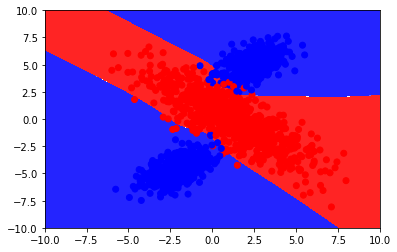

ACCURACY:  0.98
CONFUSION MATRIX: 
 [[185.   4.]
 [  4. 207.]]
Cost for epoch 0 is 0.3039081736754988
Cost for epoch 100 is 0.28505937727273306
Cost for epoch 200 is 0.2683840485022099
Cost for epoch 300 is 0.25355340588859937
Cost for epoch 400 is 0.24030255151322846
Cost for epoch 500 is 0.22841157720845967
Cost for epoch 600 is 0.21769669341114684
Cost for epoch 700 is 0.20800360807052035
Cost for epoch 800 is 0.1992022649479077
Cost for epoch 900 is 0.19118258731711557


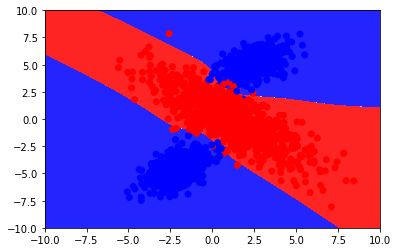

ACCURACY:  0.98
CONFUSION MATRIX: 
 [[194.   3.]
 [  5. 198.]]
Cost for epoch 0 is 0.18621637239705635
Cost for epoch 100 is 0.1794545545135292
Cost for epoch 200 is 0.17337373911294143
Cost for epoch 300 is 0.16778673562050578
Cost for epoch 400 is 0.16262794465695016
Cost for epoch 500 is 0.15785009746885328
Cost for epoch 600 is 0.1534142249878484
Cost for epoch 700 is 0.14928687350449935
Cost for epoch 800 is 0.1454388655790711
Cost for epoch 900 is 0.14184454949273068


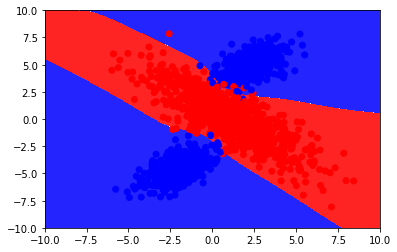

ACCURACY:  0.985
CONFUSION MATRIX: 
 [[215.   4.]
 [  2. 179.]]
Cost for epoch 0 is 0.1447016079306583
Cost for epoch 100 is 0.14111436210303402
Cost for epoch 200 is 0.13794332506692844
Cost for epoch 300 is 0.13501156105126985
Cost for epoch 400 is 0.13226810843214865
Cost for epoch 500 is 0.1296884455597621
Cost for epoch 600 is 0.12725672377679564
Cost for epoch 700 is 0.12496060065201044
Cost for epoch 800 is 0.12278956054030546
Cost for epoch 900 is 0.12073429603832668


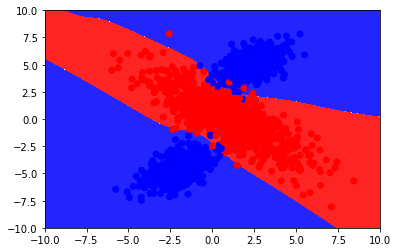

ACCURACY:  0.9925
CONFUSION MATRIX: 
 [[195.   2.]
 [  1. 202.]]
Average ACCURACY of 5 folds:  0.9695


In [12]:
avg_fold=0
for i in range(5):
    #5. Train the model
    nnmodel.fit(xtrain[i],ytrain[i],1000,alpha=0.01)
    #6. Plot decision boundary after trainning
    plot_decision_boundary(nnmodel, xtrain[i], ytrain[i])
    #7. compute accuracy and confusion matrix
    acc = 0
    y_pred = nnmodel.predict(xtest[i])
    con_mat = np.zeros((output_dim, output_dim))
    for j in range(len(y_pred)):
        con_mat[y_pred[j], ytest[i][j]] += 1
        if ytest[i][j] == y_pred[j]:
            acc += 1
    acc = acc/len(y_pred)
    avg_fold += acc 
    print ('ACCURACY: ', acc)
    print ('CONFUSION MATRIX: \n', con_mat)
    
print ('Average ACCURACY of 5 folds: ', avg_fold / 5)


## Demonstrating the effect of change in learning rate on training of the network


In [17]:
X = np.genfromtxt('DATA/data_nonLinearX.csv', delimiter=',')
y = np.genfromtxt('DATA/data_nonLinearY.csv', delimiter=',').astype(np.int64)
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
hidden_dim = 10
nnmodel = Neural_Network(input_dim, hidden_dim, output_dim)

In [18]:
theta1 = copy.deepcopy(nnmodel.theta1)
theta2 = copy.deepcopy(nnmodel.theta2)
bias1 = copy.deepcopy(nnmodel.bias1)
bias2 = copy.deepcopy(nnmodel.bias2)

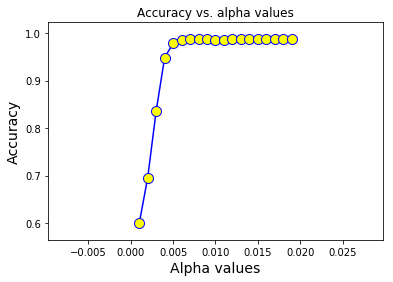

In [19]:
# demonstrating the effect of change in learning rate on training of the network
alphalist = list(np.arange(0.001,0.02,0.001))                       # range of alpha values to test
accuracylist = [] 
for a in alphalist:
    nnmodel.theta1 = copy.deepcopy(theta1)
    nnmodel.theta2 = copy.deepcopy(theta2)
    nnmodel.bias1 = copy.deepcopy(bias1)
    nnmodel.bias2 = copy.deepcopy(bias2)
    nnmodel.fit(X, y, 1000, alpha=a, flag=2)
    accuracy = 0
    y_pred = nnmodel.predict(X)
    con_mat = np.zeros((output_dim, output_dim))
    for i in range(len(y_pred)):
        con_mat[y_pred[i], y[i]] += 1
        if y[i] == y_pred[i]:
            accuracy += 1
    accuracy = accuracy / len(y_pred)
    accuracylist.append(accuracy)

# Plot the accuracy against the alpha value
plt.scatter(alphalist, accuracylist)
plt.title ('Accuracy vs. alpha values')
plt.xlabel('Alpha values', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.plot(alphalist, accuracylist, color ='blue', linestyle = 'solid',
marker ='o', markerfacecolor ='yellow', markersize =10)
plt.show()

## Linear data

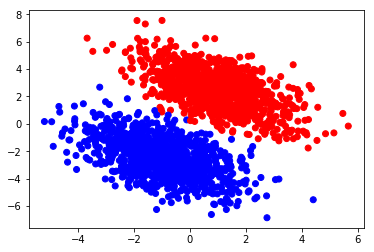

In [20]:
#2. plot data
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

## 5-fold cross validation

In [21]:
#splitting dataset X
xtrain=[]
xtest = np.split(X1,5)
for i in range(0,5):
    xtrain.append(np.asarray([x for x in X1 if x not in xtest[i]]))
xtrain = np.asarray(xtrain)

#splitting dataset y
ytest = np.split(y1,5)
ytrain = []
ytrain.append(y1[400:2000])
ytrain.append(np.concatenate((y1[:400],y1[800:2000])))
ytrain.append(np.concatenate((y1[:800],y1[1200:2000])))
ytrain.append(np.concatenate((y1[:1200],y1[1600:2000])))
ytrain.append(y1[:1600])
ytrain = np.asarray(ytrain)

In [22]:
#3. Initialize model
input_dim = np.shape(X1)[1]
output_dim = np.max(y1) + 1
nnmodel = Neural_Network(input_dim,10,output_dim)

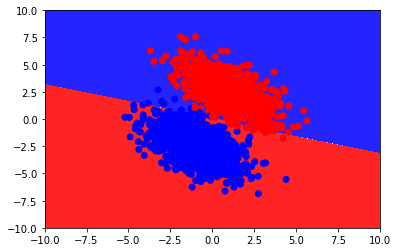

In [23]:
#4. Plot decision boundary
plot_decision_boundary(nnmodel, X1, y1)

## Train Classification Model
**Classification** tries to predict, which of a small set of classes, a sample in a population belongs to. Mathematically, the aim is to find $y$, a **label** based on knowing a feature vector $X$.

## Model: linear data with regularization

Cost for epoch 0 is 2.0790872373301132
Cost for epoch 100 is 0.3213025554881917
Cost for epoch 200 is 0.17219799124109572
Cost for epoch 300 is 0.12065714854136686
Cost for epoch 400 is 0.09455608434708747
Cost for epoch 500 is 0.07875012244636276
Cost for epoch 600 is 0.06812513479329518
Cost for epoch 700 is 0.06047602681219606
Cost for epoch 800 is 0.05469571191034461
Cost for epoch 900 is 0.05016699372715989


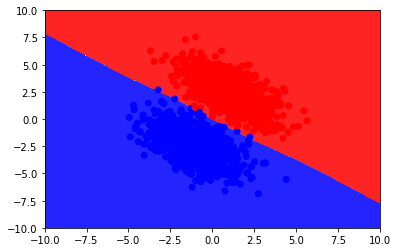

ACCURACY:  0.9975
CONFUSION MATRIX: 
 [[202.   0.]
 [  1. 197.]]
Cost for epoch 0 is 0.04490864431915061
Cost for epoch 100 is 0.04201292457970557
Cost for epoch 200 is 0.039591392845759625
Cost for epoch 300 is 0.037534298605414344
Cost for epoch 400 is 0.035763433480306
Cost for epoch 500 is 0.03422154663200301
Cost for epoch 600 is 0.0328657579487328
Cost for epoch 700 is 0.03166331064746008
Cost for epoch 800 is 0.03058874743622853
Cost for epoch 900 is 0.02962198263784235


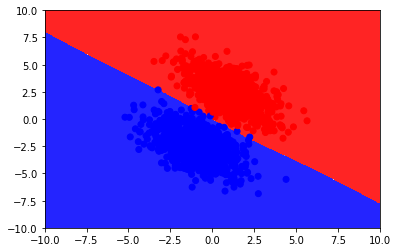

ACCURACY:  0.9975
CONFUSION MATRIX: 
 [[198.   1.]
 [  0. 201.]]
Cost for epoch 0 is 0.02797484428491544
Cost for epoch 100 is 0.027121650123348533
Cost for epoch 200 is 0.026349921772445918
Cost for epoch 300 is 0.025648222575494733
Cost for epoch 400 is 0.025007215174356116
Cost for epoch 500 is 0.024419190286047603
Cost for epoch 600 is 0.02387771868856706
Cost for epoch 700 is 0.02337739016311271
Cost for epoch 800 is 0.022913614873148747
Cost for epoch 900 is 0.022482470279960268


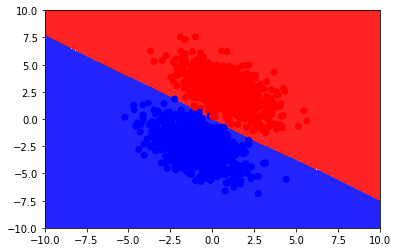

ACCURACY:  0.9925
CONFUSION MATRIX: 
 [[202.   0.]
 [  3. 195.]]
Cost for epoch 0 is 0.0250801443286237
Cost for epoch 100 is 0.024708242046482715
Cost for epoch 200 is 0.02435847907385233
Cost for epoch 300 is 0.024028817712293375
Cost for epoch 400 is 0.023717466694319764
Cost for epoch 500 is 0.02342284472343505
Cost for epoch 600 is 0.023143550354151464
Cost for epoch 700 is 0.022878336952348685
Cost for epoch 800 is 0.02262609175618158
Cost for epoch 900 is 0.02238581826923548


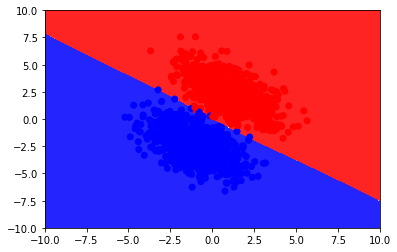

ACCURACY:  1.0
CONFUSION MATRIX: 
 [[192.   0.]
 [  0. 208.]]
Cost for epoch 0 is 0.02147346231827526
Cost for epoch 100 is 0.021235335447855882
Cost for epoch 200 is 0.021008489382133115
Cost for epoch 300 is 0.02079209337701735
Cost for epoch 400 is 0.02058539787538867
Cost for epoch 500 is 0.02038772467478176
Cost for epoch 600 is 0.02019845852369883
Cost for epoch 700 is 0.020017039903422656
Cost for epoch 800 is 0.019842958799426356
Cost for epoch 900 is 0.019675749303507135


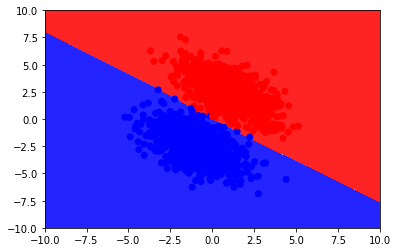

ACCURACY:  1.0
CONFUSION MATRIX: 
 [[202.   0.]
 [  0. 198.]]
Average ACCURACY of 5 folds:  0.9975000000000002


In [24]:
avg_fold=0
for i in range(5):
    #5. Train the model with l2 regularization
    nnmodel.fit_regularization(xtrain[i],ytrain[i],1000,alpha=0.01)
    #6. Plot decision boundary after trainning
    plot_decision_boundary_regularization(nnmodel, xtrain[i], ytrain[i])
    #7. compute accuracy and confusion matrix
    acc = 0
    y_pred = nnmodel.predict_regularization(xtest[i])
    con_mat = np.zeros((output_dim, output_dim))
    for j in range(len(y_pred)):
        con_mat[y_pred[j], ytest[i][j]] += 1
        if ytest[i][j] == y_pred[j]:
            acc += 1
    acc = acc/len(y_pred)
    avg_fold += acc
    print ('ACCURACY: ', acc)
    print ('CONFUSION MATRIX: \n', con_mat)


print ('Average ACCURACY of 5 folds: ', avg_fold / 5)



## Model: linear data with out regularization

Cost for epoch 0 is 2.075333560704642
Cost for epoch 100 is 0.3173662984444327
Cost for epoch 200 is 0.16812035528215957
Cost for epoch 300 is 0.11648340801333461
Cost for epoch 400 is 0.09030857403709007
Cost for epoch 500 is 0.07444238602097691
Cost for epoch 600 is 0.06376634570374966
Cost for epoch 700 is 0.056072846664313475
Cost for epoch 800 is 0.05025321630219635
Cost for epoch 900 is 0.045689187994670484


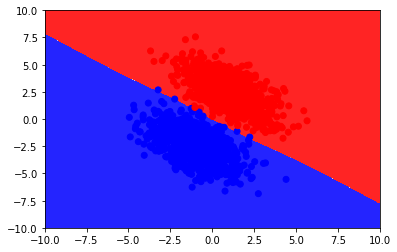

ACCURACY:  0.9975
CONFUSION MATRIX: 
 [[202.   0.]
 [  1. 197.]]
Cost for epoch 0 is 0.04039825715281745
Cost for epoch 100 is 0.037473689262909185
Cost for epoch 200 is 0.0350256233967443
Cost for epoch 300 is 0.03294398102313875
Cost for epoch 400 is 0.031150289731636926
Cost for epoch 500 is 0.02958708315107831
Cost for epoch 600 is 0.02821130298139141
Cost for epoch 700 is 0.02699004344487918
Cost for epoch 800 is 0.025897721402383035
Cost for epoch 900 is 0.024914143924965694


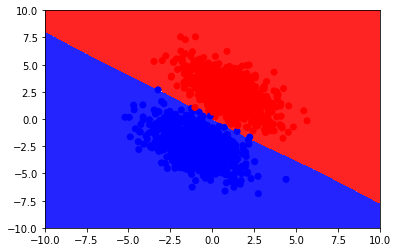

ACCURACY:  0.9975
CONFUSION MATRIX: 
 [[198.   1.]
 [  0. 201.]]
Cost for epoch 0 is 0.023245680851399476
Cost for epoch 100 is 0.02237755233647909
Cost for epoch 200 is 0.02159140523649152
Cost for epoch 300 is 0.020875796791112712
Cost for epoch 400 is 0.020221375861906653
Cost for epoch 500 is 0.019620415266891594
Cost for epoch 600 is 0.019066465930446436
Cost for epoch 700 is 0.018554097128393583
Cost for epoch 800 is 0.01807869863547617
Cost for epoch 900 is 0.017636328077972736


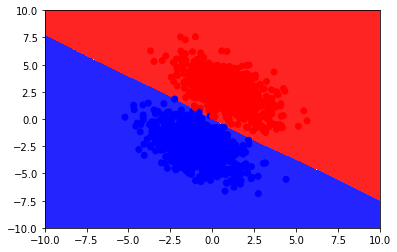

ACCURACY:  0.9925
CONFUSION MATRIX: 
 [[202.   0.]
 [  3. 195.]]
Cost for epoch 0 is 0.020219508029481918
Cost for epoch 100 is 0.019837225618086374
Cost for epoch 200 is 0.01947741127049046
Cost for epoch 300 is 0.019138010179497532
Cost for epoch 400 is 0.018817214816971486
Cost for epoch 500 is 0.018513428499647672
Cost for epoch 600 is 0.018225235265727783
Cost for epoch 700 is 0.017951374813266082
Cost for epoch 800 is 0.017690721527772842
Cost for epoch 900 is 0.017442266835610773


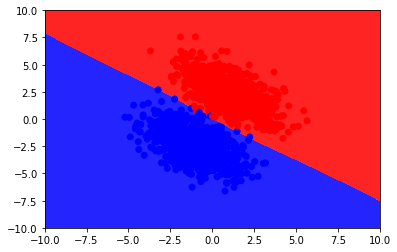

ACCURACY:  1.0
CONFUSION MATRIX: 
 [[192.   0.]
 [  0. 208.]]
Cost for epoch 0 is 0.016516676555489336
Cost for epoch 100 is 0.016270604677840753
Cost for epoch 200 is 0.016035998220594882
Cost for epoch 300 is 0.015812020316745366
Cost for epoch 400 is 0.015597915308267839
Cost for epoch 500 is 0.015392998965361561
Cost for epoch 600 is 0.015196650120509402
Cost for epoch 700 is 0.01500830347761334
Cost for epoch 800 is 0.014827443402797407
Cost for epoch 900 is 0.014653598539862905


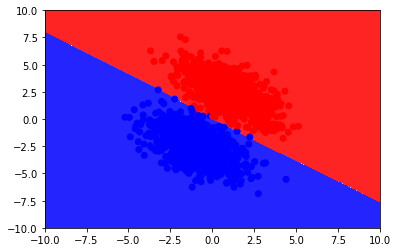

ACCURACY:  1.0
CONFUSION MATRIX: 
 [[202.   0.]
 [  0. 198.]]
Average ACCURACY of 5 folds:  0.9975000000000002


In [25]:
avg_fold=0
for i in range(5):
    #5. Train the model
    nnmodel.fit(xtrain[i],ytrain[i],1000,alpha=0.01)
    #6. Plot decision boundary after trainning
    plot_decision_boundary(nnmodel, xtrain[i], ytrain[i])
    #7. compute accuracy and confusion matrix
    acc = 0
    y_pred = nnmodel.predict(xtest[i])
    con_mat = np.zeros((output_dim, output_dim))
    for j in range(len(y_pred)):
        con_mat[y_pred[j], ytest[i][j]] += 1
        if ytest[i][j] == y_pred[j]:
            acc += 1
    acc = acc/len(y_pred)
    avg_fold += acc
    print ('ACCURACY: ', acc)
    print ('CONFUSION MATRIX: \n', con_mat)
    
print ('Average ACCURACY of 5 folds: ', avg_fold / 5)


### Digit Data training

In [26]:
# 1. Load the data
x_train = np.genfromtxt('DATA/Digit_X_train.csv', delimiter=',')
y_train = np.genfromtxt('DATA/Digit_y_train.csv', delimiter=',').astype(np.int64)
x_test = np.genfromtxt('DATA/Digit_X_test.csv', delimiter=',')
y_test = np.genfromtxt('DATA/Digit_y_test.csv', delimiter=',').astype(np.int64)

In [27]:
# 2. Initialize model
input_dim = np.shape(x_train)[1]
output_dim = np.max(y_train) + 1
hidden_dim = 17
nnmodel =  Neural_Network(input_dim, hidden_dim, output_dim)

In [28]:
# 3. Train the data
nnmodel.fit(x_train, y_train, 10000, alpha=0.01, flag=2)

0

In [29]:
#4. compute accuracy and confusion matrix


In [30]:
accuracy = 0
y_pred = nnmodel.predict(x_test)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y_test[i]] += 1
    if y_test[i] == y_pred[i]:
        accuracy += 1
accuracy = accuracy / len(y_pred)
print ('ACCURACY: ', accuracy)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.9432703003337041
CONFUSION MATRIX: 
 [[87.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0. 80.  0.  1.  1.  0.  1.  0.  3.  0.]
 [ 0.  0. 86.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0. 80.  0.  0.  0.  0.  1.  1.]
 [ 1.  0.  0.  0. 87.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  4.  0. 87.  0.  0.  3.  2.]
 [ 0.  2.  0.  0.  0.  1. 90.  0.  0.  0.]
 [ 0.  0.  0.  2.  0.  0.  0. 84.  1.  0.]
 [ 0.  0.  0.  4.  0.  0.  0.  1. 78.  0.]
 [ 0.  8.  0.  0.  3.  3.  0.  3.  2. 89.]]


In [31]:
# 1. Load the data
x_train = np.genfromtxt('DATA/Digit_X_train.csv', delimiter=',')
y_train = np.genfromtxt('DATA/Digit_y_train.csv', delimiter=',').astype(np.int64)
x_test = np.genfromtxt('DATA/Digit_X_test.csv', delimiter=',')
y_test = np.genfromtxt('DATA/Digit_y_test.csv', delimiter=',').astype(np.int64)

In [32]:
# 2. Initialize model
input_dim = np.shape(x_train)[1]
output_dim = np.max(y_train) + 1
hidden_dim = 17
nnmodel =  Neural_Network(input_dim, hidden_dim, output_dim)

In [33]:
# 3. Train the data
nnmodel.fit_regularization(x_train, y_train, 6000, alpha=0.01,flag = 2)

0

In [34]:
#4. compute accuracy and confusion matrix


In [35]:
accuracy = 0
y_pred = nnmodel.predict_regularization(x_test)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y_test[i]] += 1
    if y_test[i] == y_pred[i]:
        accuracy += 1
accuracy = accuracy / len(y_pred)
print ('ACCURACY: ', accuracy)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.9265850945494994
CONFUSION MATRIX: 
 [[85.  0.  0.  0.  2.  0.  0.  0.  0.  0.]
 [ 0. 77.  0.  3.  0.  0.  1.  1.  4.  0.]
 [ 0.  0. 84.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  2. 77.  0.  0.  0.  0.  0.  3.]
 [ 1.  2.  0.  0. 85.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  3.  0. 87.  0.  0.  4.  2.]
 [ 1.  1.  0.  0.  1.  1. 90.  0.  1.  0.]
 [ 0.  0.  0.  5.  0.  0.  0. 84.  0.  0.]
 [ 0.  0.  0.  2.  0.  0.  0.  1. 77.  0.]
 [ 0. 10.  0.  0.  4.  3.  0.  2.  2. 87.]]
